# 1. Exploratory Data Analysis

In [1]:
# Import libraries

# Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting
import seaborn as sns

# Mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# load the data
df = pd.read_csv("Online_Retail.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [5]:
# Only take quantity > 0 & display shape of data frame

df = df.loc[df['Quantity'] > 0]
df.shape

(531285, 8)

# 2. Data Cleaning/Preparation

In [6]:
# Check if there are NaN values
X = df
X.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [7]:
# Further Data Processing

X = X.dropna(subset=['CustomerID'])
X['Description'] = X['Description'].str.strip()    
X.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
X['InvoiceNo'] = X['InvoiceNo'].astype('str')
X = X[~X['InvoiceNo'].str.contains('C')]

C:\Users\LIMFAM~1\AppData\Local\Temp/ipykernel_19200/3234831687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Description'] = X['Description'].str.strip()
D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\LIMFAM~1\AppData\Local\Temp/ipykernel_19200/3234831687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

# 3. Association Rule Learning with Apriori Algorithm

In [8]:
# Create Pivot Table

shopping_matrix = X.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')

In [9]:
shopping_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
# Replace NaN with 0

shopping_matrix = shopping_matrix.applymap(lambda x: 1 if x>0 else 0)

shopping_matrix.head(10)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop non StockCode Items

shopping_matrix.drop(['BANK CHARGES', 'C2', 'DOT', 'M', 'PADS', 'POST'], inplace= True, axis = 1)

In [12]:
# Assigning Apriori

frequently_bought = apriori(shopping_matrix, min_support=0.05, use_colnames=True)

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
frequently_bought.head()

,support,itemsets
0,0.075824,(20685)
1,0.057156,(20712)
2,0.054390,(20718)
3,0.054851,(20719)
4,0.053008,(20723)


In [14]:
# Building Association Rules Using Frequent Itemset

rules = association_rules(frequently_bought, metric="lift", min_threshold=1)  # setting the threshold of Lift Value as 1.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20725),(20726),0.122609,0.085734,0.057617,0.469925,5.481193,0.047105,1.724785
1,(20726),(20725),0.085734,0.122609,0.057617,0.672043,5.481193,0.047105,2.675324
2,(20727),(20725),0.105554,0.122609,0.069140,0.655022,5.342368,0.056198,2.543324
3,(20725),(20727),0.122609,0.105554,0.069140,0.563910,5.342368,0.056198,2.051057
4,(20728),(20725),0.110394,0.122609,0.070984,0.643006,5.244369,0.057449,2.457721


# 4. Visualisation

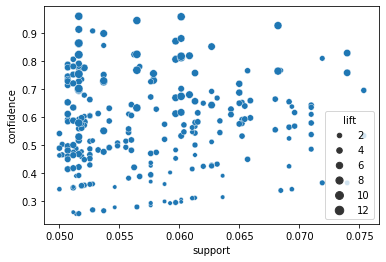

In [15]:
# Scatterplot

sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

In [16]:
# Filtering the results

rules[(rules['confidence'] >= 0.8) & (rules['lift'] >= 6)].sort_values(by='confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
244,"(22698, 22423, 22699)",(22697),0.053699,0.089191,0.051625,0.961373,10.778809,0.046835,23.579832
237,"(22698, 22699)",(22697),0.062687,0.089191,0.060152,0.959559,10.758464,0.054561,22.521821
219,"(22698, 22423)",(22697),0.059691,0.089191,0.056465,0.945946,10.605838,0.051141,16.849965
126,(22698),(22697),0.073519,0.089191,0.068218,0.927900,10.403506,0.061661,12.632524
242,"(22698, 22697, 22423)",(22699),0.056465,0.097488,0.051625,0.914286,9.378453,0.046120,10.529308
230,"(22698, 22423)",(22699),0.059691,0.097488,0.053699,0.899614,9.227954,0.047880,8.990409
236,"(22698, 22697)",(22699),0.068218,0.097488,0.060152,0.881757,9.044781,0.053502,7.632674
224,"(22697, 22423)",(22699),0.068449,0.097488,0.059691,0.872054,8.945252,0.053018,7.053845
247,"(22698, 22423)","(22697, 22699)",0.059691,0.073980,0.051625,0.864865,11.690494,0.047209,6.852547
245,"(22697, 22423, 22699)",(22698),0.059691,0.073519,0.051625,0.864865,11.763789,0.047236,6.855958


#### Conclusion

In conclusion, it was observed that customers who bought ID 22698 often purchase it with ID 22697 with a confidence rating of 92%, while customers who bought 22698, 22423 and 22699 will end up buying 22697 with a confidence rating of 96%.

This suggests that these items can be group together in the shop, to further maximise sales.
